In [2]:
import numpy 

#from amuse.test.amusetest import TestWithMPI

from amuse.community.seba.interface import SeBaInterface, SeBa

from amuse.units import units
from amuse.units import constants
from amuse.datamodel import Particle
from amuse.datamodel import Particles

ImportError: No module named abc

# Automated Single Star Evolution - TORCH

In [77]:
import numpy as np
def compute_dmdt_vterm(prev_mass, se_temp, se_radius, se_mass, se_lum, dt):
    """
    Note: prev_mass = mass before dt update, NOT the ZAMS mass
    """

    dm_dt = (prev_mass - se_mass)/dt
    # Since we are using less certain mass loss rates anyway, just use velocity from Leitherer et al. 1992.
    vterm = 10**(1.23 - 0.30 * np.log10(se_lum.value_in(units.LSun)) 
                 + 0.55*np.log10(se_mass.value_in(units.MSun))
                 + 0.64*np.log10(se_temp.value_in(units.K))) | units.km/units.s
        
    return dm_dt, vterm
def compute_wind_pressure(dm_dt, v_wind, R_bubble):
    rho_wind = dm_dt / (4*numpy.pi * v_wind * R_bubble**2)
    p_ram = rho_wind*v_wind**2
    return p_ram

In [81]:
worker = SeBa()
initial_mass = 20.0 | units.MSun
star_age = 0.11 | units.Myr
dt = 0.01 | units.Myr
R_bubble = 0.32 | units.pc

_tmp = worker.evolve_star(initial_mass, star_age, 0.02)

se_time, se_mass, se_radius, se_lum, se_temp, se_evol_time, se_type = _tmp

_tmp = compute_dmdt_vterm(initial_mass, se_temp, se_radius, se_mass, se_lum, dt)
dm_dt = _tmp[0]
vterm = _tmp[1]
worker.stop()
print "mass loss rate: ", dm_dt.value_in(units.MSun / units.s)
p_ram = compute_wind_pressure(dm_dt, vterm, R_bubble)
print p_ram.value_in(units.g * units.s **-2 / units.cm )#.value_in(units.g*units.cm**-1*units.s**-2)

mass loss rate:  1.02355974537e-14
4.72506277394e-10


In [76]:
worker = SeBa()
initial_mass = 50.0 | units.MSun
star_age = 0.11 | units.Myr
dt = 0.01 | units.Myr

se_time, se_mass, se_radius, se_lum, se_temp, se_evol_time, se_type = worker.evolve_star(initial_mass, star_age, 0.02)

se_time2, se_mass2, se_radius2, se_lum2, se_temp2, se_evol_time2, se_type2 = worker.evolve_star(se_mass, star_age+dt, 0.02)

dm_dt = (initial_mass - se_mass)/dt

worker.stop()
print "Mass loss rate: ", dm_dt.value_in(units.MSun / units.s)

Mass loss rate:  4.59626595217e-13


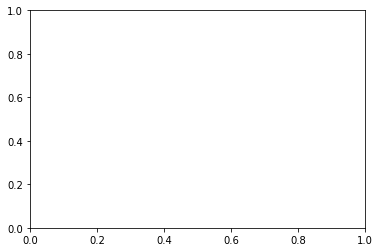

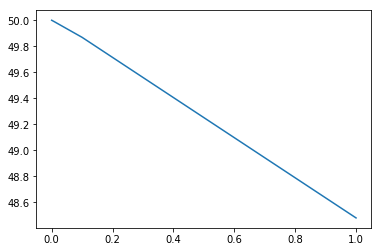

In [56]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(star_age.value_in(units.Myr), star_mass)
plt.show()